In [1]:
# Import necessary libraries

import os
import pandas as pd
from langchain_experimental.agents import create_csv_agent
from langchain_openai import AzureChatOpenAI
from langchain_openai import AzureOpenAI
from langchain.agents.agent_types import AgentType
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# Load data
df = pd.read_csv('../data/MSFT-Stock.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1006 non-null   object 
 1   Open       1006 non-null   float64
 2   High       1006 non-null   float64
 3   Low        1006 non-null   float64
 4   Close      1006 non-null   float64
 5   Adj Close  1006 non-null   float64
 6   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.1+ KB


In [3]:
# Define the deployment and model name for the Azure OpenAI Service.
DEPLOYMENT_NAME = "gpt-35-turbo-instruct"
MODEL_NAME = "gpt-35-turbo-instruct"
API_VERSION="2023-12-01-preview"

# Create the agent.
# agent = create_csv_agent(AzureChatOpenAI(azure_deployment=DEPLOYMENT_NAME, model_name=MODEL_NAME, openai_api_version=API_VERSION), 
#                          '../data/MSFT-Stock.csv',
#                          verbose=True,
#                          agent_type=AgentType.OPENAI_FUNCTIONS,)

agent = create_csv_agent(AzureOpenAI(azure_deployment=DEPLOYMENT_NAME, model_name=MODEL_NAME, openai_api_version=API_VERSION), 
                         '../data/MSFT-Stock.csv',
                         verbose=True,)


In [4]:
# Rows of data
agent.invoke("How many rows of data do you have?")



> Entering new AgentExecutor chain...
Thought: I need to use the shape attribute of the dataframe to get the number of rows.
Action: python_repl_ast
Action Input: df.shape[0]
Observation: 1006
Thought: I now know the final answer
Final Answer: 1006

> Finished chain.


{'input': 'How many rows of data do you have?', 'output': '1006'}

In [10]:
# Fields of data
agent.invoke("How many fields do you have?")

'There are 7 fields in the dataframe.'

In [11]:
# Date range
agent.invoke("Please tell me the date range in the data")

'The date range in the data is 1458 days.'

In [12]:
# Average of Close by year
agent.invoke("Please calculate the averages of Close by year")

'The averages of Close by year are 195.33 for 2020, 275.94 for 2021, 268.92 for 2022, 313.95 for 2023, and 386.81 for 2024.'

{'input': 'Please plot a trend chart of the Close field, with Date on the x-axis. Rotate the x-axis labels by 30 degrees.',
 'output': 'Axes(0.125,0.2;0.775x0.68)'}

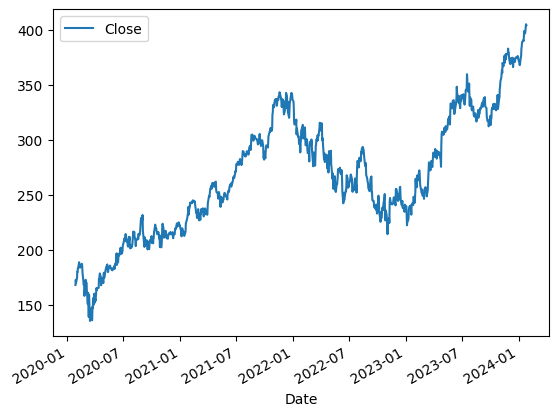

In [15]:
# Plot a trend chart
agent.invoke("Please plot a trend chart of the Close field, with Date on the x-axis. Rotate the x-axis labels by 30 degrees.")

In [10]:
# Predict the Close value for the next 7 days
agent.invoke("Use python prophet not fbprophet package to forecast the Close values for each day in the next 7 days.")




> Entering new AgentExecutor chain...
Thought: I need to import the prophet library and create a prophet model.
Action: python_repl_ast
Action Input: 
import prophet
Thought: I need to create a dataframe with the Date and Close columns only.
Action: python_repl_ast
Action Input:
df[['Date', 'Close']]
Observation: SyntaxError: invalid syntax (<unknown>, line 2)
Thought: I need to use the loc function to subset the dataframe.
Action: python_repl_ast
Action Input:
df.loc[:,['Date', 'Close']]
Observation: KeyError: "None of [Index(['Date', 'Close'], dtype='object')] are in the [columns]"
Thought: I need to make sure the column names are spelled correctly.
Action: python_repl_ast
Action Input:
df.columns
Observation: Index(['ds', 'Open', 'High', 'Low', 'y', 'Adj Close', 'Volume',
       'Forecasted Close'],
      dtype='object')
Thought: I need to rename the columns to match the requirements of the prophet model.
Action: python_repl_ast
Action Input:
df.rename(columns={'Date': 'ds', 'Clos

16:35:09 - cmdstanpy - INFO - Chain [1] start processing


 I need to fit the prophet model to the dataframe.
Action: python_repl_ast
Action Input:
model = prophet.Prophet()
model.fit(df)

16:35:10 - cmdstanpy - INFO - Chain [1] done processing



Observation: <prophet.forecaster.Prophet object at 0x7f0f52bf3250>
Thought: I need to create a dataframe with the future dates to forecast.
Action: python_repl_ast
Action Input:
future = model.make_future_dataframe(periods=7)
Observation: 
Thought: I need to use the predict function to forecast the Close values for the future dates.
Action: python_repl_ast
Action Input:
model.predict(future)
Observation:              ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2020-01-29  165.215704  150.800616  177.004415   165.215704   165.215704   
1    2020-01-30  165.284535  151.818194  177.569465   165.284535   165.284535   
2    2020-01-31  165.353366  153.052959  177.868532   165.353366   165.353366   
3    2020-02-03  165.559860  155.882781  181.099614   165.559860   165.559860   
4    2020-02-04  165.628691  155.595638  182.243317   165.628691   165.628691   
...         ...         ...         ...         ...          ...          ...   
1008 2024-01-29  393.020

{'input': 'Use python prophet not fbprophet package to forecast the Close values for each day in the next 7 days.',
 'output': "The forecasted Close values for each day in the next 7 days are included in the 'yhat' column of the dataframe above."}